# Customer Behavior Forecasting & RFM-Based Segmentation

This project analyzes customer purchasing behavior using transactional retail data
and applies RFM analysis to segment customers for business decision-making.

## Objective
- Understand customer purchasing patterns
- Segment customers using RFM analysis
- Provide business-driven recommendations

⚠️ Note:
Some columns (InvoiceNo / Invoice) were standardized during cleaning
to avoid inconsistencies across datasets.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Dataset
- Source: UCI Machine Learning Repository
- Data Type: Retail transaction records
- Rows: ~500K+
- Columns include Invoice, Customer ID, Quantity, Price, Date

In [7]:
import pandas as pd

df = pd.read_excel(
    "../data/online_retail.xlsx",
    engine="openpyxl"
)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1. Initial Data Exploration (EDA)

In this section, we explore the structure, size, and basic statistics of the online retail transaction dataset to understand customer purchase behavior.

In [8]:
df.shape

(525461, 8)

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [13]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [14]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [15]:
df.columns = df.columns.str.strip().str.replace(" ", "")
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')

## Data Cleaning
- Remove missing values
- Remove negative quantities
- Convert invoice date to datetime

In [10]:
df = df.dropna(subset=["Customer ID"])
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

## Feature Engineering
Creating total purchase value per transaction

In [29]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [12]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [13]:
df[["Quantity", "Price", "TotalPrice"]].head()

,Quantity,Price,TotalPrice
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


Aggregation (customer level)

In [16]:
customer_df = (
    df.groupby("Customer ID")
      .agg(
          NumInvoices=("Invoice", "nunique"),
          TotalQuantity=("Quantity", "sum"),
          TotalSpend=("TotalPrice", "sum"),
          LastPurchaseDate=("InvoiceDate", "max")
      )
      .reset_index()
)

Rename columns

In [ ]:
df.columns

In [18]:
customer_df = (
    df.groupby("Customer ID")
      .agg({
          "Invoice": "nunique",
          "Quantity": "sum",
          "TotalPrice": "sum"
      })
      .reset_index()
)

In [27]:
customer_df.columns = ["Customer ID", "NumInvoices", "TotalQuantity", "TotalSpend"]

EDA (distribution)

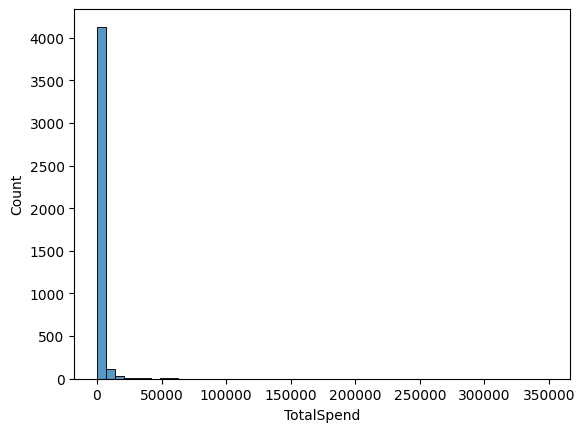

In [27]:
sns.histplot(customer_df["TotalSpend"], bins=50)
plt.show()

Correlation

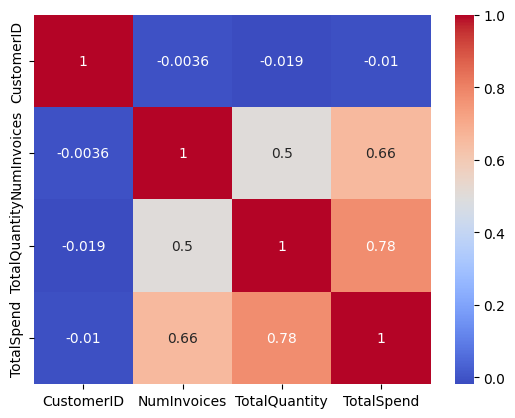

In [28]:
sns.heatmap(customer_df.corr(), annot=True, cmap="coolwarm")
plt.show()

## Why RFM Analysis?

RFM (Recency, Frequency, Monetary) is a proven customer segmentation technique
used by marketing and growth teams to identify high-value, at-risk, and
low-engagement customers for targeted business actions.

## RFM Analysis
- Recency: Days since last purchase
- Frequency: Number of purchases
- Monetary: Total spending

In [20]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [23]:
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice": "nunique",
    "TotalPrice": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm = rfm.reset_index()

## Customer Segmentation
Customers are segmented into value-based groups for targeted strategies.

In [24]:
rfm["R"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["M"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])
rfm["RM_Score"] = rfm[["R","M"]].sum(axis=1)

## Visualization
Distribution of customers across segments

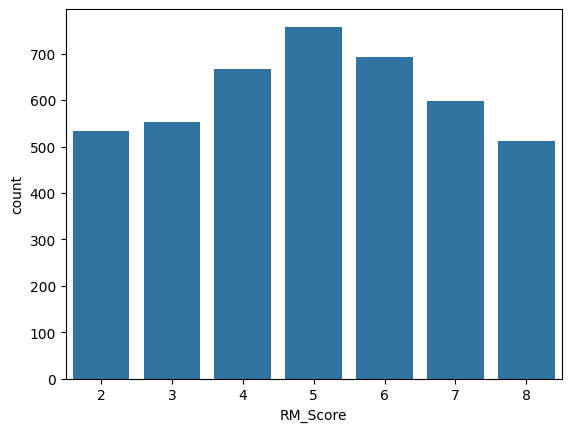

In [25]:
sns.countplot(x="RM_Score", data=rfm)
plt.show()

## Business Insights
- VIP customers should receive loyalty rewards
- Mid-value customers are ideal for upselling
- Low-value customers require re-engagement campaigns`

In [26]:
customer_df.sort_values("TotalSpend", ascending=False).head(10)

,CustomerID,NumInvoices,TotalQuantity,TotalSpend
4183,18102.0,89,124216,349164.35
1637,14646.0,78,170278,248396.50
1269,14156.0,102,108107,196566.74
1840,14911.0,205,69722,152147.57
939,13694.0,94,125893,131443.19
3744,17511.0,31,55107,84541.17
1951,15061.0,86,51791,83284.38
3128,16684.0,27,54555,80489.21
3177,16754.0,29,63551,65500.07
4065,17949.0,74,30112,60117.60


## Conclusion
This project demonstrates how data-driven customer segmentation can directly
support marketing, retention, and revenue growth strategies.